In [1]:
import pandas as pd
from tqdm import tqdm 
from geopy.distance import geodesic as d
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

DIR = './Data/'

In [74]:
acc_cols = ['accident_index','longitude', 'latitude', 'date']
acc_df = pd.read_csv(DIR+'acc_clean.csv', usecols = acc_cols)
pubs_df = pd.read_csv(DIR+'pubs_clean.csv')
vehicles_df = pd.read_csv(DIR+'vehicles_clean.csv')

In [5]:
#filter out accidents in 2020
acc_df['date'] = pd.to_datetime(acc_df['date'], infer_datetime_format=True)
acc_2020 = acc_df.loc[acc_df['date'].dt.year == 2020]

In [23]:
#filter out e-scooter accidents
vehicles_2020 = vehicles_df.loc[vehicles_df['accident_index'].isin(acc_2020.accident_index.values)]
e_scooters = vehicles_2020.loc[vehicles_2020.vehicle_type == 90]
e_acc = pd.merge(e_scooters, acc_2020, how='inner')

## Ploting the time series

In [147]:
not_near_pub = []
for index, row in tqdm(e_acc[:].iterrows(), total=e_acc[:].shape[0]):
    lat = row.latitude
    long = row.longitude
    if(pubs_df[((pubs_df.latitude <=  lat + 0.0069) & (pubs_df.latitude >= lat - 0.0069)) & 
                ((pubs_df.longitude <= long + 0.022) & (pubs_df.longitude  >= long - 0.022))].fas_id.values.size==0):
        not_near_pub.append(row.accident_index)

len(not_near_pub),len(set(not_near_pub)) ,e_acc.shape

100%|██████████| 1185/1185 [00:03<00:00, 364.28it/s]


(117, 114, (1185, 6))

In [149]:
# filter out 114 e-scooter accidents not near pubs
e_acc_near_pub = e_acc.loc[~ e_acc.accident_index.isin(not_near_pub)]

### Month Aggregated Plot

<AxesSubplot:>

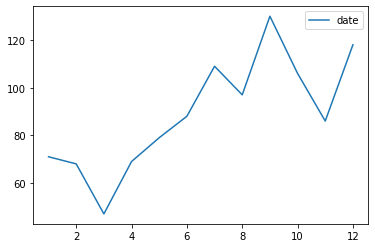

In [201]:
month_freq_df = pd.DataFrame(e_acc_near_pub.date.dt.month.value_counts().sort_index())#, columns=['month'])
month_freq_df.plot()

In [202]:
trace1 = go.Scatter(x=month_freq_df.index,
                    y=month_freq_df.date,
                    name = "E-Scooter Accidents in 2020",
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='plotly example',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

### Weekly Aggregate Plot

In [ ]:
week_freq_df = pd.DataFrame(e_acc_near_pub.date.dt.isocalendar().week.value_counts().sort_index(), columns=['week'])

In [186]:
trace1 = go.Scatter(x=week_freq_df.index,
                    y=week_freq_df.week,
                    name = "E-Scooter Accidents in 2020",
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='plotly example',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

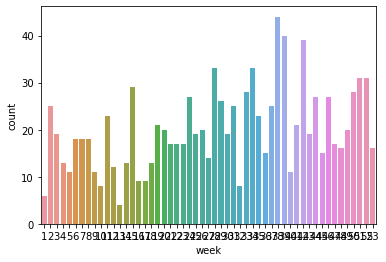

In [174]:
frequency_df = pd.DataFrame(e_acc_near_pub.date.dt.isocalendar().week, columns=['week'])
# frequency_df
ax = sns.countplot(x="week", data=frequency_df,)#, palette="Set3")